In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

import matplotlib.pyplot as plt

In [2]:
def calculateMetrics(df, allClasses):
    
    f1_allClassified = []
    f1_optDecBound = []

    roc_allClassified = []
    roc_optDecBound = []
    
    prec_allClassified = []
    prec_optDecBound = []
    
    rec_allClassified = []
    rec_optDecBound = []
    
    falsePositive_allClassified = []
    falsePositive_optDecBound = []
    truePositive_allClassified = []
    truePositive_optDecBound = []
    falseNegative_allClassified = []
    falseNegative_optDecBound = []
    trueNegative_allClassified = []
    trueNegative_optDecBound = []
        
    seed_list = []
    class_list = []

    for seed in range(FOLDS):
        df_part = df[df["seed"] == seed].copy()
        for c in allClasses:
            f1_allClassified.append(round(f1_score(df_part[c], df_part["pred_" + c], zero_division=0), 3))
            try:
                roc_allClassified.append(round(roc_auc_score(df_part[c], df_part["pred_" + c]), 3))
            except:
                roc_allClassified.append(0)
            prec_allClassified.append(round(precision_score(df_part[c], df_part["pred_" + c], zero_division=0), 3))
            rec_allClassified.append(round(recall_score(df_part[c], df_part["pred_" + c]), 3))
            
            falsePositive_allClassified.append(len(df_part.loc[(df_part[c]==0) & (df_part["pred_" + c]==1)] ))
            truePositive_allClassified.append(len(df_part.loc[(df_part[c]==1) & (df_part["pred_" + c]==1)] ))
            falseNegative_allClassified.append(len(df_part.loc[(df_part[c]==1) & (df_part["pred_" + c]==0)] ))
            trueNegative_allClassified.append(len(df_part.loc[(df_part[c]==0) & (df_part["pred_" + c]==0)] ))
                                               
            
            
            if 'predOptimal_'+ c in df_part.columns:
                f1_optDecBound.append(round(f1_score(df_part[c], df_part["predOptimal_" + c], zero_division=0), 3))
                try:
                    roc_optDecBound.append(round(roc_auc_score(df_part[c], df_part["predOptimal_" + c]), 3))
                except:
                    roc_optDecBound.append(0)
                prec_optDecBound.append(round(precision_score(df_part[c], df_part["predOptimal_" + c], zero_division=0), 3))
                rec_optDecBound.append(round(recall_score(df_part[c], df_part["predOptimal_" + c]), 3))
                
                falsePositive_optDecBound.append(len(df_part.loc[(df_part[c]==0) & (df_part["predOptimal_" + c]==1)] ))
                truePositive_optDecBound.append(len(df_part.loc[(df_part[c]==1) & (df_part["predOptimal_" + c]==1)] ))
                falseNegative_optDecBound.append(len(df_part.loc[(df_part[c]==1) & (df_part["predOptimal_" + c]==0)] ))
                trueNegative_optDecBound.append(len(df_part.loc[(df_part[c]==0) & (df_part["predOptimal_" + c]==0)] ))
                
            else:
                f1_optDecBound.append(0)
                roc_optDecBound.append(0)
                prec_optDecBound.append(0)
                rec_optDecBound.append(0)
                falsePositive_optDecBound.append(0)
                truePositive_optDecBound.append(0)
                falseNegative_optDecBound.append(0)
                trueNegative_optDecBound.append(0)
           
            seed_list.append(seed)
            class_list.append(c)

    metrics = pd.DataFrame({
    'class': class_list,
    'seed': seed_list,
    'f1_allClassified': f1_allClassified,
    'f1_optDecBound': f1_optDecBound,
    'roc_allClassified': roc_allClassified,
    'roc_optDecBound': roc_optDecBound,
    'prec_allClassified': prec_allClassified,
    'prec_optDecBound': prec_optDecBound,
    'rec_allClassified': rec_allClassified,
    'rec_optDecBound': rec_optDecBound,
    'falsePositive_allClassified':falsePositive_allClassified,
    'falsePositive_optDecBound':falsePositive_optDecBound,
    'truePositive_allClassified':truePositive_allClassified,
    'truePositive_optDecBound':truePositive_optDecBound,
    'falseNegative_allClassified':falseNegative_allClassified,
    'falseNegative_optDecBound':falseNegative_optDecBound,
    'trueNegative_allClassified':trueNegative_allClassified,
    'trueNegative_optDecBound':trueNegative_optDecBound
    })

    return metrics


In [8]:
df.head()

,id,seed,Forest Management,Other technologies,restoration of landscapes/peats,Algae farming,Blue Carbon,Agroforestry,AR,Biochar,...,predProba_Biochar,predProba_CCUS,predProba_DAC(CS),predProba_CCS,predProba_BECCS,predProba_Enhanced Weathering (land based),predProba_Soil Carbon Sequestration,predProba_General Literature on CDR/NET,predProba_Ocean alkalinity enhancement,predProba_Ocean fertilization & Artificial upwelling
0,1967.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200915,0.318418,0.224351,0.176288,0.282117,0.427145,0.595048,0.379691,0.152107,0.382746
1,1987.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.395626,0.277300,0.206330,0.215250,0.241458,0.294142,0.516677,0.297674,0.453723,0.378058
2,2287.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.457345,0.279972,0.205286,0.178627,0.210085,0.321043,0.640089,0.292408,0.423926,0.317807
3,2348.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.512607,0.236134,0.202346,0.161211,0.183882,0.359693,0.766851,0.261036,0.390202,0.334264
4,2965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225740,0.179265,0.394501,0.312642,0.254758,0.344057,0.433925,0.405419,0.657729,0.999656


In [7]:
FOLDS = 3
LABEL = 'label_3'

df = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2023-03-20_test_predicted_tech_unbalanced_hyperparamTuning.csv")
df = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2023-01-02_train_predicted_tech_balanced.csv")

train = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2022-12-06_technologies_training.csv")

#df = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2023-04-11_test_meth_predicted_unbalanced_hyperparamTuning_3fold.csv")
#train = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2022-12-06_methods_training.csv")

#df = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2023-04-11_test_context_predicted_unbalanced_hyperparamTuning_3fold.csv")
#train = pd.read_csv("/home/sarah/projects/nets/data/2022-11-28_context_training.csv")

allClasses = [i.split('pred_')[1] for i in df.columns if 'pred_' in i]


metrics = calculateMetrics(df, allClasses).sort_values("class")
metrics_means = metrics.groupby("class", as_index=False).mean().sort_values("class")
metrics_std = metrics.groupby("class", as_index=False).std().sort_values("class")

sample_size = train.loc[train[LABEL]==1].groupby("category", as_index=False).size()


/home/sarah/projects/nets/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sarah/projects/nets/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarah/projects/nets/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sarah/projects/nets/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined 

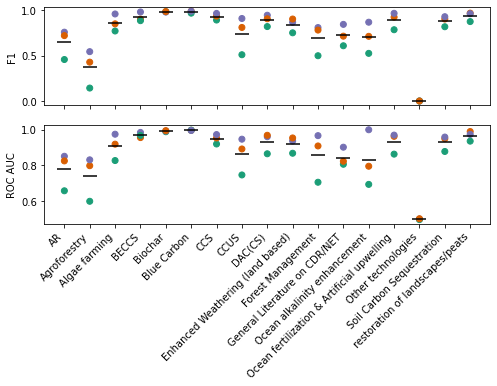

In [4]:
fig, ax = plt.subplots(2, figsize=(8,4))

allClasses = sorted(allClasses)
class_dict_no = {}
for i, c in enumerate(allClasses):
    class_dict_no[c] = 3*i+1

class_dict = {}   
for i, c in enumerate(allClasses):
    class_dict[c] = 3*i+2
cols = ['#1b9e77','#d95f02','#7570b3']
col_dict = {i: cols[i] for i in range(3)}

metrics["col"] = metrics["seed"].replace(col_dict)

def plotMetric(ax, metric, y_label):
    ax.scatter(metrics["class"], metrics[metric], color=metrics["col"])
    ax.scatter(metrics_means["class"], metrics_means[metric], c="black", marker='_', s=9*20)
    ax.set_ylabel(y_label)
    _=ax.set_xticks([i for i in range(len(allClasses))], ['' for i in range(len(allClasses))])
    

plotMetric(ax[0], "f1_optDecBound", "F1")
plotMetric(ax[1], "roc_optDecBound", "ROC AUC")


_=ax[1].set_xticks([i for i in range(len(allClasses))], allClasses, rotation = 45, ha='right')
plt.savefig("figures/metrics_context.svg", bbox_inches="tight", facecolor='white', edgecolor='none')

In [19]:
tech_goodOrder = [
    "CCS",
    "BECCS",
    "DAC(CS)",
    "CCUS",
    "Soil Carbon Sequestration",
    "AR",
    "restoration of landscapes/peats",
    "Agroforestry",
    "Forest Management",
    "Biochar",
    "Enhanced Weathering (land based)",
    "Ocean alkalinity enhancement",
    "Blue Carbon",
    "Algae farming",
    "Ocean fertilization & Artificial upwelling",
    "General Literature on CDR/NET",
    
]
exclude_technologies = ["CCS", "CCUS", "Algae farming","Other technologies",]
tech_goodOrder = [t for t in tech_goodOrder if t not in exclude_technologies]

In [7]:
tech_dict = {
 'AR':'Aforestation/Reforestation',
 'restoration of landscapes/peats':'Restoration of Landscapes/Peats',
 'Ocean alkalinity enhancement':'Ocean Alkalinity Enhancement',
 'Ocean fertilization & Artificial upwelling':'Ocean Fertilization & Artificial Upwelling'
}
meth_dict = {
 'data analysis / statistical analysis / econometrics' : 'Data Analysis / Statistical Analysis / Econometrics',
 'experimental - field /fieldstudy': 'Experimental - Field study',
 'experimental - laboratory': 'Experimental - Laboratory',
 'modelling': 'Modelling',
 'qualitative research': 'Qualitative Research',
 'review': 'Review',
 'survey': 'Survey',
 'systematic reviews': 'Systematic Review'
    
}
context_dict = {
 'earth system': 'Earth System',
 'equity & ethics':'Equity & Ethics',
 'policy/government': 'Policy / Government',
 'public perception': 'Public Perception',
 'socio-economic pathways': 'Socio-economic Pathways',
 'technology': 'Technology'
}


In [11]:
table = pd.DataFrame({"Main Focus": metrics_means["class"],
                      "Number of Samples": sample_size["size"],
                      "F1 - mean": metrics_means["f1_optDecBound"],
                      "F1 - std": metrics_std["f1_optDecBound"],
                      "ROC - mean": metrics_means["roc_optDecBound"],
                      "ROC - std": metrics_std["roc_optDecBound"],
                      "truePos - mean": metrics_means["truePositive_optDecBound"],
                      "truePos - std": metrics_std["truePositive_optDecBound"],
                      "falsePos - mean": metrics_means["falsePositive_optDecBound"],
                      "falsePos - std": metrics_std["falsePositive_optDecBound"],
                      "trueNeg - mean": metrics_means["trueNegative_optDecBound"],
                      "trueNeg - std": metrics_std["trueNegative_optDecBound"],
                      "falseNeg - mean": metrics_means["falseNegative_optDecBound"],
                      "falseNeg - std": metrics_std["falseNegative_optDecBound"],})

#table = table.loc[table.Technology.isin(tech_goodOrder)]
#table["Technology"] = table["Technology"].replace(tech_dict)

#table = table.loc[table["Method"]!="statistical analysis / econometrics"]
#table["Method"] = table["Method"].replace(meth_dict)
#table = table.sort_values("Method")

#table["Main Focus"] = table["Main Focus"].replace(context_dict)
table

table.to_excel("figures/context_class_result.xlsx", index=False)

,Main Focus,Number of Samples,F1 - mean,F1 - std,ROC - mean,ROC - std,truePos - mean,truePos - std,falsePos - mean,falsePos - std,trueNeg - mean,trueNeg - std,falseNeg - mean,falseNeg - std
0,AR,107,0.646667,0.164491,0.776667,0.105306,14.333333,4.163332,3.000000,1.000000,1130.666667,7.023769,13.000000,9.539392
1,Agroforestry,20,0.372333,0.206904,0.741333,0.126081,3.333333,2.516611,7.000000,1.000000,1147.666667,2.516611,3.000000,1.000000
2,Algae farming,98,0.862000,0.094398,0.906000,0.074726,26.666667,10.016653,2.000000,1.732051,1127.000000,6.557439,5.333333,3.511885
3,BECCS,351,0.924667,0.051228,0.968667,0.014572,106.000000,12.000000,11.333333,11.015141,1038.000000,9.539392,5.666667,2.081666
4,Biochar,634,0.985333,0.003055,0.991333,0.003055,201.000000,13.228757,3.000000,2.000000,954.000000,12.288206,3.000000,1.732051
5,Blue Carbon,351,0.984667,0.012702,0.996000,0.001000,115.000000,16.370706,2.666667,2.886751,1042.666667,14.189198,0.666667,0.577350
6,CCS,1261,0.932667,0.036692,0.948000,0.026851,387.333333,17.616280,30.000000,21.283797,717.333333,26.102363,26.333333,10.692677
7,CCUS,174,0.744667,0.208327,0.860667,0.103877,38.666667,13.650397,11.666667,10.016653,1097.333333,5.507571,13.333333,8.736895
8,DAC(CS),246,0.892333,0.063956,0.930667,0.057873,66.666667,5.859465,5.333333,4.163332,1078.333333,3.511885,10.666667,9.865766
9,Enhanced Weathering (land based),172,0.842333,0.079431,0.918667,0.045545,46.666667,13.868429,8.333333,2.309401,1098.000000,10.440307,8.000000,3.464102


In [18]:
from ast import literal_eval
allclass = pd.read_csv("data/2023-04-13_tech_predicted_unbalanced_hyperparamTuning.csv", converters={"all_pred_tech":literal_eval})
allClasses_ex = allclass.explode("all_pred_tech")
counts_predOptim = allClasses_ex.groupby("all_pred_tech", as_index=False).size().rename(columns={"size":"predicted counts",
                                                                                                 "all_pred_tech":"Main Focus"})

table.merge(counts_predOptim).to_excel('figures/fig_data/TechClassifier_Performance_optimalDecBoundary.xlsx')

In [26]:
table = pd.DataFrame({"Main Focus": metrics_means["class"],
                      "Number of Samples": sample_size["size"],
                      "F1 - mean": metrics_means["f1_allClassified"],
                      "F1 - std": metrics_std["f1_allClassified"],
                      "ROC - mean": metrics_means["roc_allClassified"],
                      "ROC - std": metrics_std["roc_allClassified"],
                      "truePos - mean": metrics_means["truePositive_allClassified"],
                      "truePos - std": metrics_std["truePositive_allClassified"],
                      "falsePos - mean": metrics_means["falsePositive_allClassified"],
                      "falsePos - std": metrics_std["falsePositive_allClassified"],
                      "trueNeg - mean": metrics_means["trueNegative_allClassified"],
                      "trueNeg - std": metrics_std["trueNegative_allClassified"],
                      "falseNeg - mean": metrics_means["falseNegative_allClassified"],
                      "falseNeg - std": metrics_std["falseNegative_allClassified"],})

counts_05decBound = []
for tech in tech_goodOrder:
    counts_05decBound.append(sum(allclass[f"pred_{tech}"]))
counts_05decBound = pd.DataFrame({"Main Focus":tech_goodOrder, "predicted counts":counts_05decBound})
table.merge(counts_05decBound).to_excel('figures/fig_data/TechClassifier_Performance_05lDecBoundary.xlsx')

In [24]:
allclass.shape

(44780, 55)

In [69]:
# macro-f1
allClasses = [i.split("predProba_")[1] for i in df.columns if "predProba_" in i]
print('F1',f1_score(df[allClasses], df[["predOptimal_" + c for c in allClasses]], zero_division=0, average='macro'))
print('ROC AUC',roc_auc_score(df[allClasses], df[["predOptimal_" + c for c in allClasses]], average='macro'))


F1 0.7714853160142419
ROC AUC 0.8755045050031769


### Number of samples per class

In [20]:
train = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2022-12-06_technologies_training.csv")
#train = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2022-12-06_methods_training.csv")
#train = train.loc[train.category!='statistical analysis / econometrics']
train = pd.read_csv("/home/sarah/projects/nets/data/2022-11-28_context_training.csv")

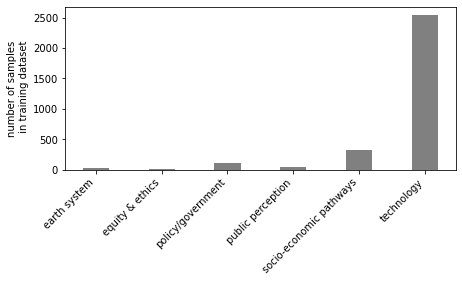

In [21]:
train = train.loc[train.label_3==1]
labels = train.groupby("category").size()

fig, ax = plt.subplots(figsize=(7,3))
ax.bar(labels.index, labels, width=0.4, color='grey')
_=ax.set_xticks([i for i in labels.index], labels.index, rotation=45, ha='right')
ax.set_ylabel("number of samples\n in training dataset")
plt.savefig("figures/samplenum_context.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### Result of Relevance-classifier

In [58]:
df = pd.read_csv("/home/sarah/projects/nets_climatebert/data/2023-03-25_test_predicted_relevant.csv")
df["pred_binary"] = np.where(df.pred>=0.5, 1, 0)

f1_score(df["label_3"],df["pred_binary"])
roc_auc_score(df["label_3"],df["pred_binary"])

0.8509997240466515

### Comparison to other classifiers

In [162]:
LABEL = "label_3"

# relevance
rel_climate = "/home/sarah/projects/nets_climatebert/data/2023-03-25_test_predicted_relevant.csv"
rel_bert    = "/home/sarah/projects/nets_climatebert/data/2023-07-04_test_predicted_relevant_distilbert.csv"
rel_sklearn = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_relevant_predicted_sklearn.csv"

# technology
tech_climate = "/home/sarah/projects/nets_climatebert/data/2023-03-20_test_predicted_tech_unbalanced_hyperparamTuning.csv"
tech_bert    = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_predicted_tech_distilbert.csv"
tech_sklearn = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_tech_predicted_sklearn.csv"

# methods
meth_climate = "/home/sarah/projects/nets_climatebert/data/2023-04-11_test_meth_predicted_unbalanced_hyperparamTuning_3fold.csv"
meth_bert    = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_predicted_methods_distilbert.csv"
meth_sklearn = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_meth_predicted_sklearn.csv"

# context
cont_climate = "/home/sarah/projects/nets_climatebert/data/2023-04-11_test_context_predicted_unbalanced_hyperparamTuning_3fold.csv"
cont_bert    = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_predicted_context_distilbert.csv"
cont_sklearn = "/home/sarah/projects/nets_climatebert/data/2023-07-05_test_context_predicted_sklearn.csv"

In [79]:
rel_cli = pd.read_csv(rel_climate)
rel_ber = pd.read_csv(rel_bert)
rel_skl = pd.read_csv(rel_sklearn)

rel_cli["prediction"] = np.where(rel_cli["pred"]>0.5, 1, 0)
rel_ber["prediction"] = np.where(rel_ber["pred"]>0.5, 1, 0)

In [80]:
print(rel_skl.shape)
print(rel_ber.shape)
print(rel_cli.shape)

(5325, 4)
(5266, 5)
(5266, 5)


In [132]:
FOLDS = 3
f1_cli = []
f1_ber = []
f1_skl = []

for seed in range(FOLDS):
    cli_part = rel_cli[rel_cli["seed"] == seed].copy()
    ber_part = rel_ber[rel_ber["seed"] == seed].copy()
    skl_part = rel_skl[rel_skl["seed"] == seed].copy()
    
    f1_cli.append(f1_score(cli_part[LABEL], cli_part["prediction"]))
    f1_ber.append(f1_score(ber_part[LABEL], ber_part["prediction"]))
    f1_skl.append(f1_score(skl_part[LABEL], skl_part["pred"]))
    
f1_rel = [np.mean(f1_cli),np.mean(f1_ber),np.mean(f1_skl)]

In [164]:
def calculate_marcof1_multilabel(climate, bert, sklearn):
    clim = pd.read_csv(climate)
    bert = pd.read_csv(bert)
    skle = pd.read_csv(sklearn)

    allClasses = [i.split("predProba_")[1] for i in clim.columns if "predProba_" in i and '_statistical analysis / econometrics' not in i]
    predallClasses = [i for i in clim.columns if "predProba_" in i and '_statistical analysis / econometrics' not in i] 

    clim[predallClasses] = np.where(clim[predallClasses] > 0.5, 1, 0)
    bert[predallClasses] = np.where(bert[predallClasses] > 0.5, 1, 0)
    skle[predallClasses] = np.where(skle[predallClasses] > 0.5, 1, 0)

    f1_cli = []
    f1_ber = []
    f1_skl = []

    for seed in range(FOLDS):
        cli_part = clim[clim["seed"] == seed].copy()
        ber_part = bert[bert["seed"] == seed].copy()
        skl_part = skle[skle["seed"] == seed].copy()

        f1_cli.append(f1_score(cli_part[allClasses], cli_part[predallClasses], average='macro'))
        f1_ber.append(f1_score(ber_part[allClasses], ber_part[predallClasses], average='macro'))
        f1_skl.append(f1_score(skl_part[allClasses], skl_part[predallClasses], average='macro'))

    f1 = [np.mean(f1_cli),np.mean(f1_ber),np.mean(f1_skl)]
    print(f1)
    return f1

f1_tech = calculate_marcof1_multilabel(tech_climate, tech_bert, tech_sklearn)
f1_meth = calculate_marcof1_multilabel(meth_climate, meth_bert, meth_sklearn)
f1_cont = calculate_marcof1_multilabel(cont_climate, cont_bert, cont_sklearn)

[0.6964867882424758, 0.5130054031832092, 0.6846381619864976]
[0.6963763058618873, 0.37853833380782254, 0.4854401325342106]
[0.5843929615002962, 0.3138619968570327, 0.4808517773350292]


In [168]:
table = pd.DataFrame([f1_rel, f1_tech, f1_meth, f1_cont], columns=["F1 score - ClimateBert", "F1 score - DistilBert", "F1 score - SGD + Huber-loss"])
table["Classifier"] = ["Relevanz", "Technology", "Method", "Main Focus"]
table[["Classifier", "F1 score - ClimateBert", "F1 score - DistilBert", "F1 score - SGD + Huber-loss"]].to_excel("figures/classification_strategies.xlsx")